<a href="https://colab.research.google.com/github/Raybarreto/Analise_EnergiaSolar_BR/blob/main/Energia_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extração dos dados

In [105]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Raybarreto/Analise_EnergiaSolar_BR/refs/heads/main/dados_instalacoes_solares%20_2000.csv'
df = pd.read_csv(url)
df.head()

,ID Cliente,Nome do Cliente,Data da Instalação,Tipo de Instalação,Endereço (Rua),Bairro,Cidade,Estado,CEP,Valor do Serviço (R$),Tipo de Pagamento,Nº Parcelas,Instituição Financeira,Origem do Cliente,Avaliação (1-5),Comentário do Cliente,Sistema (kWp),Nº de Placas,Indicação de Quem?,Vendedor Responsável
0,CLI001,Zoe Souza,2023-07-04,Residencial,"Praça Campos, 358",Xodo-Marize,Vieira,SP,91049709,48370.73,Boleto,0,NaN,Outro,4,Optio adipisci consectetur reiciendis perspici...,4.0,12,NaN,Diana Santos
1,CLI002,Luiz Gustavo Barros,2024-12-19,Comercial,"Estação de Pastor, 1770",Solar Do Barreiro,Vargas,AL,03212-977,52868.64,Financiamento Bancário,72,Itaú,Google,2,Illo voluptates vero nihil.,3.3,11,NaN,Bruno Silva
2,CLI003,Maria Isis Nogueira,2023-09-17,Rural,"Rua da Rosa, 301",Bacurau,Sales,PB,41605-868,59582.56,Cartão de Crédito,12,Mastercard,Panfleto,2,Occaecati ducimus incidunt a animi alias adipi...,5.8,16,NaN,Fernanda Lima
3,CLI004,Isabella Fogaça,2024-05-29,Rural,"Via de Novaes, 961",Nova Cachoeirinha,da Cruz,ES,98996606,22538.89,À Vista,0,NaN,Indicação,1,NaN,12.6,32,Luna Silveira,Bruno Silva
4,CLI005,Renan da Luz,2024-12-08,Residencial,"Campo de Cirino, 1365",Gameleira,Novais da Prata,SC,43648-866,77419.02,Financiamento Bancário,48,Banco do Brasil,Panfleto,2,NaN,2.0,5,NaN,Ana Clara


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Cliente              2000 non-null   object 
 1   Nome do Cliente         2000 non-null   object 
 2   Data da Instalação      2000 non-null   object 
 3   Tipo de Instalação      2000 non-null   object 
 4   Endereço (Rua)          2000 non-null   object 
 5   Bairro                  2000 non-null   object 
 6   Cidade                  2000 non-null   object 
 7   Estado                  2000 non-null   object 
 8   CEP                     2000 non-null   object 
 9   Valor do Serviço (R$)   2000 non-null   float64
 10  Tipo de Pagamento       2000 non-null   object 
 11  Nº Parcelas             2000 non-null   int64  
 12  Instituição Financeira  983 non-null    object 
 13  Origem do Cliente       2000 non-null   object 
 14  Avaliação (1-5)         2000 non-null   

# Verificando Inconsistências nos Dados

**1. Verificar valores ausentes**

In [107]:
print("Valores Ausentes por Coluna:")
print(df.isnull().sum())

Valores Ausentes por Coluna:
ID Cliente                   0
Nome do Cliente              0
Data da Instalação           0
Tipo de Instalação           0
Endereço (Rua)               0
Bairro                       0
Cidade                       0
Estado                       0
CEP                          0
Valor do Serviço (R$)        0
Tipo de Pagamento            0
Nº Parcelas                  0
Instituição Financeira    1017
Origem do Cliente            0
Avaliação (1-5)              0
Comentário do Cliente      602
Sistema (kWp)                0
Nº de Placas                 0
Indicação de Quem?        1747
Vendedor Responsável         0
dtype: int64


**2. Verificar linhas duplicadas**


In [108]:
print(f"Número de Linhas Duplicadas: {df.duplicated().sum()}\n")

Número de Linhas Duplicadas: 0



**3. Verificar valores únicos para colunas categóricas para identificar inconsistências**

In [109]:
print("Valores Únicos para Colunas Categóricas (Amostra):")
for col in ['Tipo de Instalação', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Instituição Financeira', 'Origem do Cliente', 'Vendedor Responsável']:
    if col in df.columns:
        print(f"- {col}: {df[col].nunique()} valores únicos")
        if df[col].nunique() < 50:
            print(f"  {df[col].unique()}")
        print("-" * 30)

Valores Únicos para Colunas Categóricas (Amostra):
- Tipo de Instalação: 4 valores únicos
  ['Residencial' 'Comercial' 'Rural' 'Industrial']
------------------------------
- Cidade: 998 valores únicos
------------------------------
- Estado: 27 valores únicos
  ['SP' 'AL' 'PB' 'ES' 'SC' 'CE' 'RO' 'PA' 'GO' 'SE' 'DF' 'MA' 'BA' 'RS'
 'MG' 'PE' 'RN' 'TO' 'AM' 'AP' 'RR' 'PR' 'RJ' 'AC' 'PI' 'MT' 'MS']
------------------------------
- Tipo de Pagamento: 4 valores únicos
  ['Boleto' 'Financiamento Bancário' 'Cartão de Crédito' 'À Vista']
------------------------------
- Instituição Financeira: 11 valores únicos
  [nan 'Itaú' 'Mastercard' 'Banco do Brasil' 'Elo' 'Santander'
 'Caixa Econômica Federal' 'Bradesco' 'Sicoob' 'Nubank' 'Visa' 'Outro']
------------------------------
- Origem do Cliente: 8 valores únicos
  ['Outro' 'Google' 'Panfleto' 'Indicação' 'Mídias Sociais'
 'Site da Empresa' 'Feira/Evento' 'Parceria']
------------------------------
- Vendedor Responsável: 6 valores únicos
  ['Di

# Tratando as Inconsistências

1. **Lidar com valores ausentes**

Para `'Comentário do Cliente'` e `'Indicação de Quem?'`, faz sentido preencher` NaN` com 'Não Informado' ou 'N/A'

In [110]:
df.loc[:, 'Comentário do Cliente'] = df['Comentário do Cliente'].fillna('Não Informado')
df.loc[:, 'Indicação de Quem?'] = df['Indicação de Quem?'].fillna('N/A')

**Lidar com valores ausentes**
* Para 'C`omentário do Cliente'` e `'Indicação de Quem?`', **faz sentido** preencher `NaN` com 'Não Informado' ou `'N/A'`

* Para `'Instituição Financeira'`, se `'Tipo de Pagamento'` **não for** `'Financiamento`', preencher com `'N/A'`. Primeiro, garantir que `'Tipo de Pagamento'` seja consistente (ex: padronizar maiúsculas/minúsculas)

* Para `'Instituição Financeira'` que ainda são `NaN` onde `'Tipo de Pagamento'` É `'Financiamento'`, são valores realmente ausentes. Por enquanto, preencheremos com **'Não Informado'**, mas em um cenário real, isso exigiria investigação.

* Para `'Nº de Parcelas'`, se `'Tipo de Pagamento'` for `'À Vista'` ou `'Pix'`, deve ser 1, caso contrário preencher` NaN` com 0

In [111]:
df['Comentário do Cliente'].fillna('Não Informado', inplace=True)
df['Indicação de Quem?'].fillna('N/A', inplace=True)

df['Tipo de Pagamento'] = df['Tipo de Pagamento'].str.title() # Capitalizar a primeira letra de cada palavra
df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Instituição Financeira'] = df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Instituição Financeira'].fillna('N/A')

df['Instituição Financeira'].fillna('Não Informado', inplace=True)

df.loc[(df['Tipo de Pagamento'] == 'À Vista') | (df['Tipo de Pagamento'] == 'Pix'), 'Nº de Parcelas'] = 1
df['Nº de Parcelas'].fillna(0, inplace=True) # Assumir 0 para outros tipos não parcelados ou valores verdadeiramente ausentes

# Converter 'Data da Instalação' para objetos datetime
df['Data da Instalação'] = pd.to_datetime(df['Data da Instalação'], errors='coerce') # 'coerce' transforma datas inválidas em NaT (Not a Time)
print("Valores ausentes após tratamento inicial:")
print(df.isnull().sum())
print("\n")

# Remover linhas onde 'Data da Instalação' é NaT (se houver após a coerção)
df.dropna(subset=['Data da Instalação'], inplace=True)

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)
print(f"Número de Linhas Duplicadas após remoção: {df.duplicated().sum()}\n")

# Padronizar colunas categóricas (ex: remover espaços, padronizar maiúsculas/minúsculas)
for col in ['Tipo de Instalação', 'Endereço', 'Bairro', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Instituição Financeira', 'Origem do Cliente', 'Vendedor Responsável']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.title()

# Corrigir potenciais inconsistências em 'Avaliação (1-5)'
df['Avaliação (1-5)'] = pd.to_numeric(df['Avaliação (1-5)'], errors='coerce')
df['Avaliação (1-5)'] = df['Avaliação (1-5)'].clip(lower=1, upper=5) # Limitar valores entre 1 e 5
df['Avaliação (1-5)'].fillna(df['Avaliação (1-5)'].median(), inplace=True) # Preencher NaNs criados pela coerção com a mediana

# Garantir que as colunas numéricas sejam do tipo apropriado e lidar com possíveis entradas não numéricas
numerical_cols = ['Valor do Serviço (R$)', 'Nº Parcelas', 'Sistema (kWp)', 'Nº de Placas']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True) # Preencher NaNs com a mediana se valores não numéricos foram coercidos

Valores ausentes após tratamento inicial:
ID Cliente                0
Nome do Cliente           0
Data da Instalação        0
Tipo de Instalação        0
Endereço (Rua)            0
Bairro                    0
Cidade                    0
Estado                    0
CEP                       0
Valor do Serviço (R$)     0
Tipo de Pagamento         0
Nº Parcelas               0
Instituição Financeira    0
Origem do Cliente         0
Avaliação (1-5)           0
Comentário do Cliente     0
Sistema (kWp)             0
Nº de Placas              0
Indicação de Quem?        0
Vendedor Responsável      0
Nº de Parcelas            0
dtype: int64


Número de Linhas Duplicadas após remoção: 0



<ipython-input-111-3104964102>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comentário do Cliente'].fillna('Não Informado', inplace=True)
<ipython-input-111-3104964102>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [112]:
print("Informações do DataFrame após Tratamento de Inconsistências:")
df.info()
print("\n")
print("Valores Ausentes após Tratamento de Inconsistências:")
print(df.isnull().sum())
print("\n")
print("Primeiras Linhas do DataFrame Limpo:")
df.head()

Informações do DataFrame após Tratamento de Inconsistências:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Cliente              2000 non-null   object        
 1   Nome do Cliente         2000 non-null   object        
 2   Data da Instalação      2000 non-null   datetime64[ns]
 3   Tipo de Instalação      2000 non-null   object        
 4   Endereço (Rua)          2000 non-null   object        
 5   Bairro                  2000 non-null   object        
 6   Cidade                  2000 non-null   object        
 7   Estado                  2000 non-null   object        
 8   CEP                     2000 non-null   object        
 9   Valor do Serviço (R$)   2000 non-null   float64       
 10  Tipo de Pagamento       2000 non-null   object        
 11  Nº Parcelas             2000 non-null   int64  

,ID Cliente,Nome do Cliente,Data da Instalação,Tipo de Instalação,Endereço (Rua),Bairro,Cidade,Estado,CEP,Valor do Serviço (R$),...,Nº Parcelas,Instituição Financeira,Origem do Cliente,Avaliação (1-5),Comentário do Cliente,Sistema (kWp),Nº de Placas,Indicação de Quem?,Vendedor Responsável,Nº de Parcelas
0,CLI001,Zoe Souza,2023-07-04,Residencial,"Praça Campos, 358",Xodo-Marize,Vieira,Sp,91049709,48370.73,...,0,N/A,Outro,4,Optio adipisci consectetur reiciendis perspici...,4.0,12,N/A,Diana Santos,0.0
1,CLI002,Luiz Gustavo Barros,2024-12-19,Comercial,"Estação de Pastor, 1770",Solar Do Barreiro,Vargas,Al,03212-977,52868.64,...,72,Itaú,Google,2,Illo voluptates vero nihil.,3.3,11,N/A,Bruno Silva,0.0
2,CLI003,Maria Isis Nogueira,2023-09-17,Rural,"Rua da Rosa, 301",Bacurau,Sales,Pb,41605-868,59582.56,...,12,Mastercard,Panfleto,2,Occaecati ducimus incidunt a animi alias adipi...,5.8,16,N/A,Fernanda Lima,0.0
3,CLI004,Isabella Fogaça,2024-05-29,Rural,"Via de Novaes, 961",Nova Cachoeirinha,Da Cruz,Es,98996606,22538.89,...,0,N/A,Indicação,1,Não Informado,12.6,32,Luna Silveira,Bruno Silva,1.0
4,CLI005,Renan da Luz,2024-12-08,Residencial,"Campo de Cirino, 1365",Gameleira,Novais Da Prata,Sc,43648-866,77419.02,...,48,Banco Do Brasil,Panfleto,2,Não Informado,2.0,5,N/A,Ana Clara,0.0


# Carga e Análise dos Dados

**1. Análise Descritiva**

In [113]:
print("Estatísticas Descritivas das Principais Colunas Numéricas:")
df[['Valor do Serviço (R$)', 'Avaliação (1-5)', 'Sistema (kWp)', 'Nº de Placas']].describe()

Estatísticas Descritivas das Principais Colunas Numéricas:


,Valor do Serviço (R$),Avaliação (1-5),Sistema (kWp),Nº de Placas
count,2000.000000,2000.00000,2000.000000,2000.000000
mean,42938.084570,2.98300,11.017100,32.566000
std,21928.690802,1.42679,5.202183,15.919779
min,5087.380000,1.00000,2.000000,5.000000
25%,23004.600000,2.00000,6.400000,19.000000
50%,42471.085000,3.00000,11.200000,33.000000
75%,62186.432500,4.00000,15.400000,45.000000
max,79923.840000,5.00000,20.000000,69.000000


2. **Regiões com maior potencial de novos clientes**

Top 10 - Cidades por Número de Instalações:
Cidade
Novais        18
Pimenta       17
Cavalcante    17
Fogaça        16
Lopes         15
Garcia        14
Andrade       14
Almeida       14
Cassiano      14
Souza         14
Name: count, dtype: int64




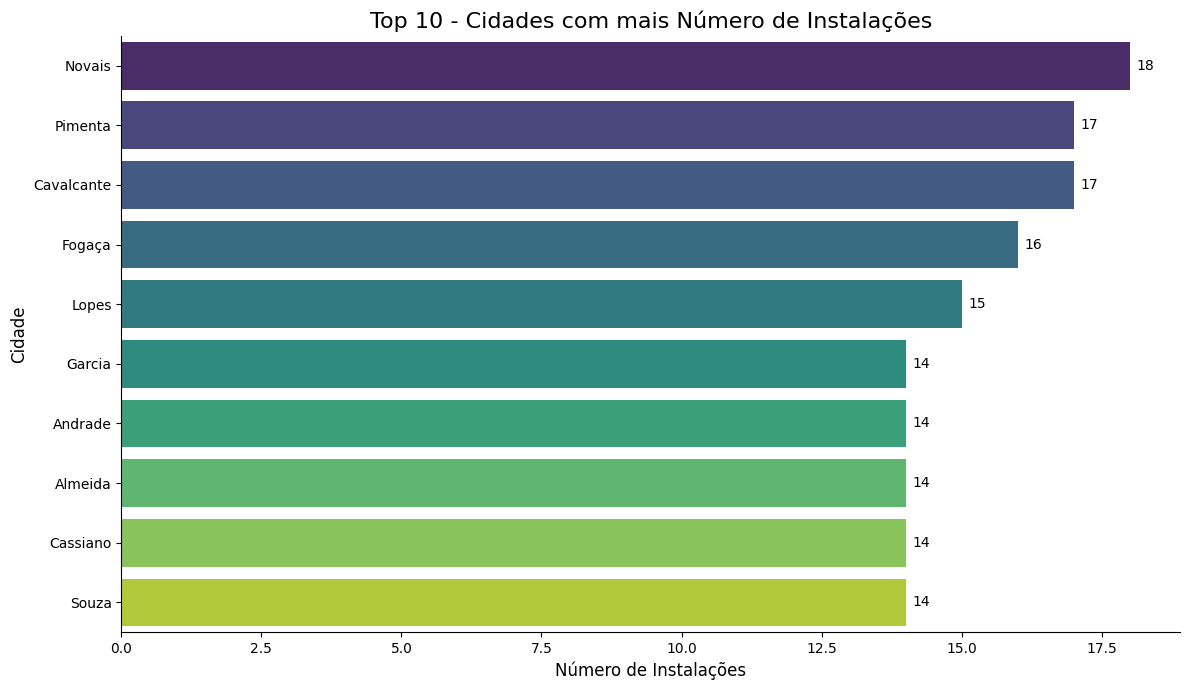

In [114]:
print("Top 10 - Cidades por Número de Instalações:")
print(df['Cidade'].value_counts().head(10))
print("\n")

plt.figure(figsize=(12, 7))
top_cidades = df['Cidade'].value_counts().head(10).reset_index()
top_cidades.columns = ['Cidade', 'Número de Instalações']
ax = sns.barplot(x='Número de Instalações', y='Cidade', hue='Cidade', data=top_cidades, palette='viridis', legend=False)
plt.title('Top 10 - Cidades com mais Número de Instalações', fontsize=16)
plt.xlabel('Número de Instalações', fontsize=12)
plt.ylabel('Cidade', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

Número de Instalações por Estado:
Estado
Rs    89
Pb    84
Rn    83
Sc    82
Am    82
Pi    81
Df    81
Pr    80
Rr    79
Go    77
Mt    77
Ro    76
Pa    76
Se    76
Ap    74
Ma    73
Es    73
Sp    72
Al    71
Pe    71
To    69
Ac    69
Ce    66
Mg    65
Rj    60
Ba    58
Ms    56
Name: count, dtype: int64




<ipython-input-115-2016243779>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([label.get_text().upper() for label in current_labels])


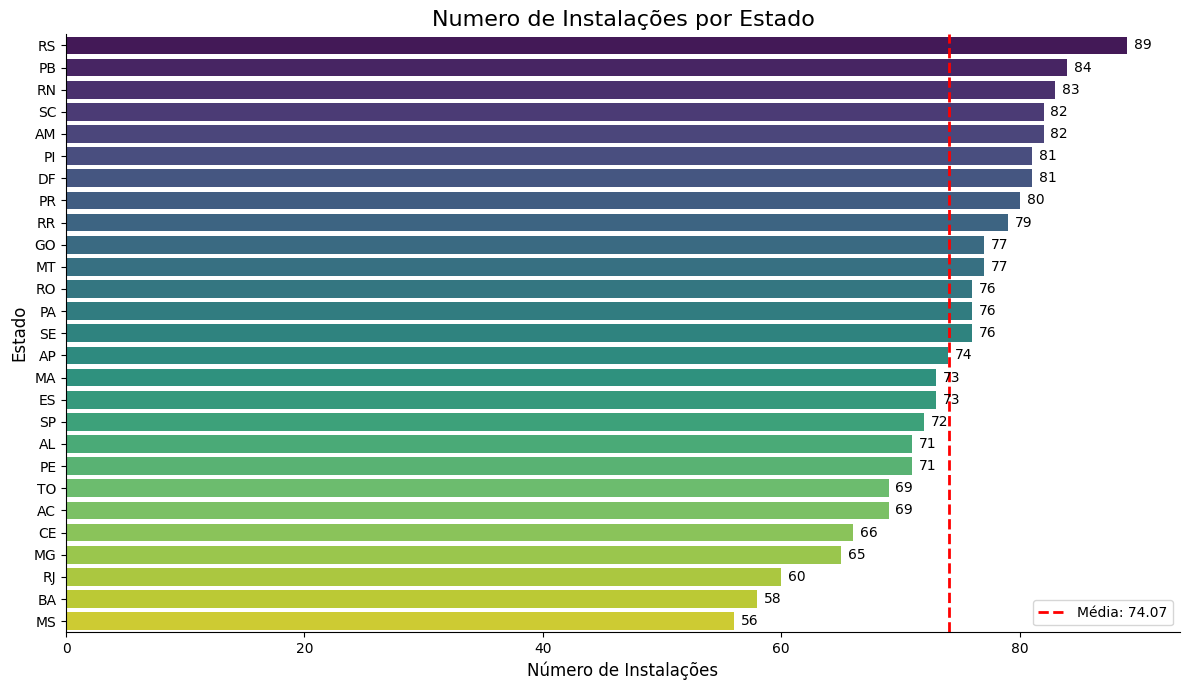

In [115]:
print("Número de Instalações por Estado:")
print(df['Estado'].value_counts().head(30))
print("\n")

plt.figure(figsize=(12, 7))
top_estado = df['Estado'].value_counts().head(30).reset_index()
top_estado.columns = ['Estado', 'Número de Instalações']
media_instalacoes = top_estado['Número de Instalações'].mean()
ax = sns.barplot(x='Número de Instalações', y='Estado', hue='Estado', data=top_estado, palette='viridis', legend=False)
plt.title('Numero de Instalações por Estado', fontsize=16)
plt.xlabel('Número de Instalações', fontsize=12)
plt.ylabel('Estado', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')
plt.axvline(media_instalacoes, color='red', linestyle='--', linewidth=2, label=f'Média: {media_instalacoes:.2f}')
plt.legend(loc='lower right')
current_labels = ax.get_yticklabels()
ax.set_yticklabels([label.get_text().upper() for label in current_labels])
plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

3. **Combinar número de instalações com a satisfação média**

In [116]:
city_analysis = df.groupby('Cidade').agg(
    Numero_instalacao=('ID Cliente', 'count'),
    Classificacao_media=('Avaliação (1-5)', 'mean')
).sort_values(by='Numero_instalacao', ascending=False)
print("Top 10 - Cidades por Número de Instalações e Avaliação Média:")
print(city_analysis.head(10))
print("\n")

state_analysis = df.groupby('Estado').agg(
    Numero_instalacao=('ID Cliente', 'count'),
    Classificacao_media=('Avaliação (1-5)', 'mean')
).sort_values(by='Numero_instalacao', ascending=False)
print("Top 10 - Estados por Número de Instalações e Avaliação Média:")
print(state_analysis.head(10))

Top 10 - Cidades por Número de Instalações e Avaliação Média:
            Numero_instalacao  Classificacao_media
Cidade                                            
Novais                     18             3.611111
Cavalcante                 17             2.823529
Pimenta                    17             2.705882
Fogaça                     16             2.750000
Lopes                      15             2.933333
Cassiano                   14             3.000000
Andrade                    14             3.428571
Garcia                     14             2.642857
Souza                      14             2.142857
Almeida                    14             2.714286


Top 10 - Estados por Número de Instalações e Avaliação Média:
        Numero_instalacao  Classificacao_media
Estado                                        
Rs                     89             2.842697
Pb                     84             2.761905
Rn                     83             2.831325
Sc                     82  

**Perfis de clientes mais satisfeitos**

Analisar 'Tipo de Instalação' e 'Origem do Cliente' em relação à 'Avaliação (1-5)'.

Avaliação Média por Tipo de Instalação:
Tipo de Instalação
Comercial      3.108108
Rural          2.962887
Industrial     2.959432
Residencial    2.896825
Name: Avaliação (1-5), dtype: float64




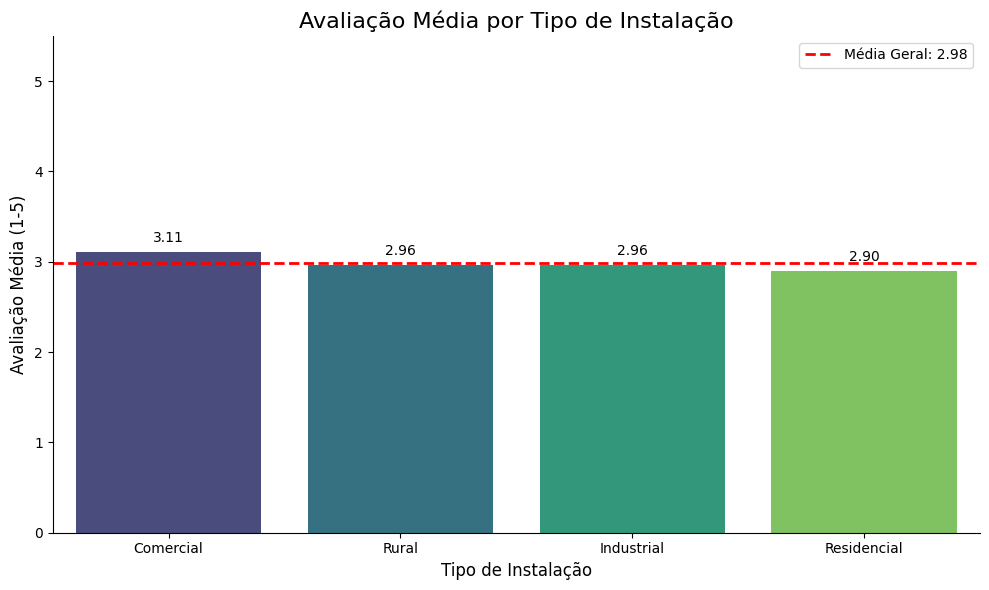

In [117]:
print("Avaliação Média por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Avaliação (1-5)'].mean().sort_values(ascending=False))
print("\n")

plt.figure(figsize=(10, 6))
avg_rating_tipo = df.groupby('Tipo de Instalação')['Avaliação (1-5)'].mean().sort_values(ascending=False).reset_index()
media_geral_avaliacao = df['Avaliação (1-5)'].mean()
ax = sns.barplot(x='Tipo de Instalação', y='Avaliação (1-5)', hue='Tipo de Instalação', data=avg_rating_tipo, palette='viridis', legend=False)
plt.title('Avaliação Média por Tipo de Instalação', fontsize=16)
plt.xlabel('Tipo de Instalação', fontsize=12)
plt.ylabel('Avaliação Média (1-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.axhline(media_geral_avaliacao, color='red', linestyle='--', linewidth=2, label=f'Média Geral: {media_geral_avaliacao:.2f}')
plt.legend(loc='upper right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tight_layout()
sns.despine()
plt.show()

Avaliação Média por Origem do Cliente:
Origem do Cliente
Site Da Empresa    3.086275
Mídias Sociais     3.065637
Panfleto           3.015267
Outro              2.996296
Parceria           2.986784
Google             2.962121
Indicação          2.920949
Feira/Evento       2.795238
Name: Avaliação (1-5), dtype: float64




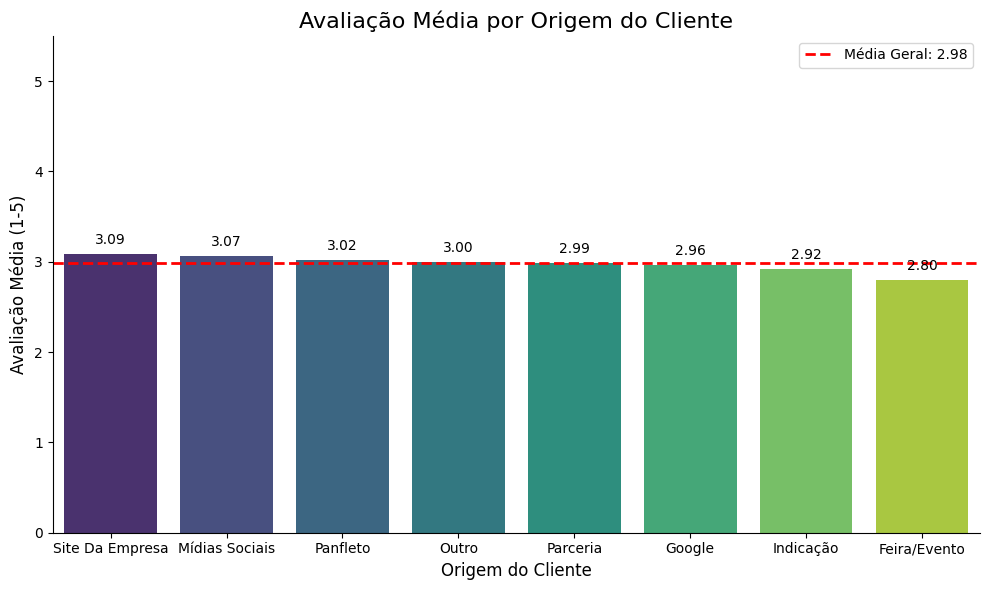

In [127]:
print("Avaliação Média por Origem do Cliente:")
print(df.groupby('Origem do Cliente')['Avaliação (1-5)'].mean().sort_values(ascending=False))
print("\n")

plt.figure(figsize=(10, 6))
avg_rating_tipo = df.groupby('Origem do Cliente')['Avaliação (1-5)'].mean().sort_values(ascending=False).reset_index()
media_geral_avaliacao = df['Avaliação (1-5)'].mean()
ax = sns.barplot(x='Origem do Cliente', y='Avaliação (1-5)', hue='Origem do Cliente', data=avg_rating_tipo, palette='viridis', legend=False)
plt.title('Avaliação Média por Origem do Cliente', fontsize=16)
plt.xlabel('Origem do Cliente', fontsize=12)
plt.ylabel('Avaliação Média (1-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.axhline(media_geral_avaliacao, color='red', linestyle='--', linewidth=2, label=f'Média Geral: {media_geral_avaliacao:.2f}')
plt.legend(loc='upper right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tight_layout()
sns.despine()
plt.show()

5. **Tipos de instalação mais lucrativos.**

In [119]:
# Analisar 'Tipo de Instalação' em relação a 'Valor do Serviço' e 'Sistema (kWp)'.
print("Valor Médio do Serviço por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Valor do Serviço (R$)'].mean().sort_values(ascending=False))
print("\n")

print("Sistema (kWp) Médio por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Sistema (kWp)'].mean().sort_values(ascending=False))
print("\n")

# Considerar também o valor médio por kWp
df['Valor_por_kWp'] = df['Valor do Serviço (R$)'] / df['Sistema (kWp)']
df.loc[df['Sistema (kWp)'] == 0, 'Valor_por_kWp'] = 0 # Evitar divisão por zero
print("Valor Médio por kWp por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Valor_por_kWp'].mean().sort_values(ascending=False))
print("\n")

Valor Médio do Serviço por Tipo de Instalação:
Tipo de Instalação
Rural          43575.548722
Residencial    43161.275635
Industrial     42961.101643
Comercial      42102.165985
Name: Valor do Serviço (R$), dtype: float64


Sistema (kWp) Médio por Tipo de Instalação:
Tipo de Instalação
Industrial     11.183164
Residencial    11.098611
Comercial      11.068533
Rural          10.708660
Name: Sistema (kWp), dtype: float64


Valor Médio por kWp por Tipo de Instalação:
Tipo de Instalação
Rural          5656.782506
Industrial     5568.774143
Residencial    5512.694012
Comercial      5388.159779
Name: Valor_por_kWp, dtype: float64




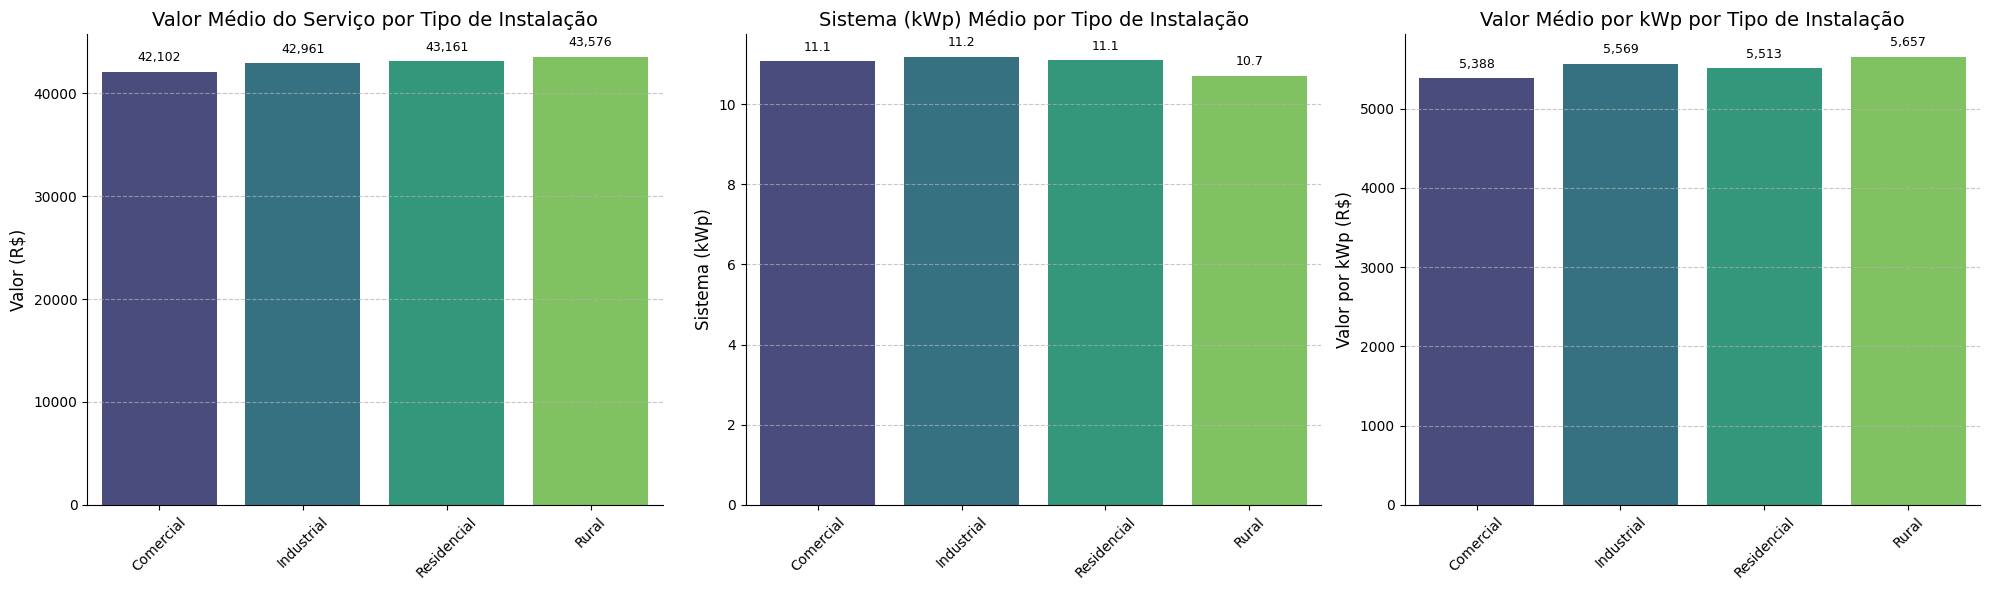

In [120]:
# Calcular 'Valor_por_kWp'
df['Valor_por_kWp'] = df['Valor do Serviço (R$)'] / df['Sistema (kWp)']
df.loc[df['Sistema (kWp)'] == 0, 'Valor_por_kWp'] = 0

# Calcular as médias para cada métrica
mean_service_value = df.groupby('Tipo de Instalação')['Valor do Serviço (R$)'].mean().reset_index()
mean_kwp_system = df.groupby('Tipo de Instalação')['Sistema (kWp)'].mean().reset_index()
mean_value_per_kwp = df.groupby('Tipo de Instalação')['Valor_por_kWp'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Gráfico 1: Valor Médio do Serviço
sns.barplot(x='Tipo de Instalação', y='Valor do Serviço (R$)', hue='Tipo de Instalação', data=mean_service_value, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Valor Médio do Serviço por Tipo de Instalação', fontsize=14)
axes[0].set_ylabel('Valor (R$)', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=9, color='black')

# Gráfico 2: Sistema (kWp) Médio
sns.barplot(x='Tipo de Instalação', y='Sistema (kWp)', hue='Tipo de Instalação', data=mean_kwp_system, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Sistema (kWp) Médio por Tipo de Instalação', fontsize=14)
axes[1].set_ylabel('Sistema (kWp)', fontsize=12)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=9, color='black')

# Gráfico 3: Valor Médio por kWp
sns.barplot(x='Tipo de Instalação', y='Valor_por_kWp', hue='Tipo de Instalação', data=mean_value_per_kwp, ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Valor Médio por kWp por Tipo de Instalação', fontsize=14)
axes[2].set_ylabel('Valor por kWp (R$)', fontsize=12)
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=9, color='black')


plt.tight_layout()
sns.despine()
plt.show()

6. **Canais de aquisição mais eficazes.**

In [121]:
# A eficácia pode ser medida pelo número de clientes adquiridos e pela avaliação média.
print("Número de Clientes e Avaliação Média por Origem do Cliente:")
análise_canal_aquisição = df.groupby('Origem do Cliente').agg(
   Numero_Clientes=('ID Cliente', 'count'),
   Classificacao_media=('Avaliação (1-5)', 'mean'),
   Receita_total=('Valor do Serviço (R$)', 'sum')
).sort_values(by='Numero_Clientes', ascending=False)
print(análise_canal_aquisição)
print("\n")

Número de Clientes e Avaliação Média por Origem do Cliente:
                   Numero_Clientes  Classificacao_media  Receita_total
Origem do Cliente                                                     
Outro                          270             2.996296    11374220.39
Google                         264             2.962121    10714684.43
Panfleto                       262             3.015267    11819021.89
Mídias Sociais                 259             3.065637    11520554.51
Site Da Empresa                255             3.086275    10919181.29
Indicação                      253             2.920949    10676552.87
Parceria                       227             2.986784     9792133.28
Feira/Evento                   210             2.795238     9059820.48




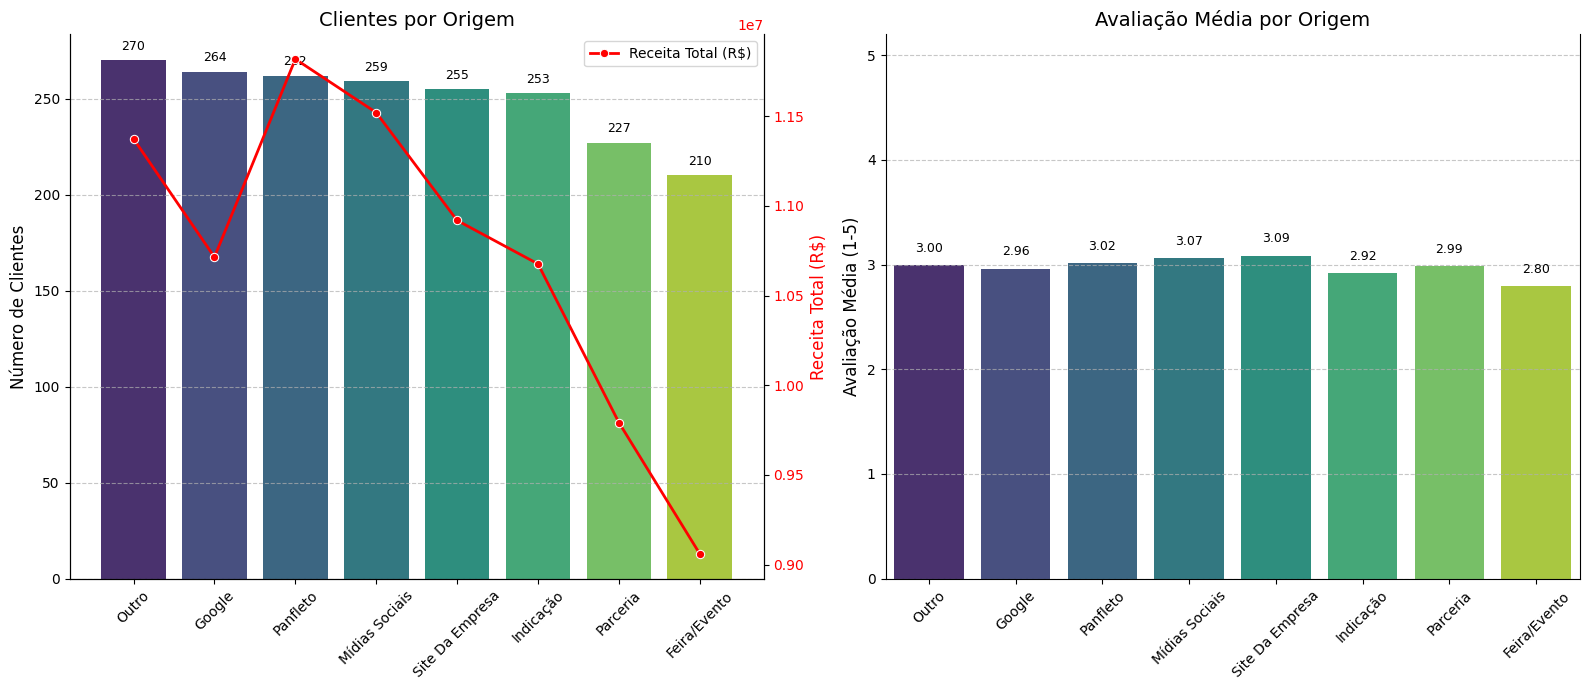

In [122]:
análise_canal_aquisição = df.groupby('Origem do Cliente').agg(
    Numero_Clientes=('ID Cliente', 'count'),
    Classificacao_media=('Avaliação (1-5)', 'mean'),
    Receita_total=('Valor do Serviço (R$)', 'sum')
).sort_values(by='Numero_Clientes', ascending=False).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico 1: Número de Clientes e Receita Total por Origem
x_order = análise_canal_aquisição['Origem do Cliente']
sns.barplot(x='Origem do Cliente', y='Numero_Clientes', hue='Origem do Cliente', data=análise_canal_aquisição, ax=axes[0], palette='viridis', order=x_order, legend=False)
axes[0].set_title('Clientes por Origem', fontsize=14)
axes[0].set_ylabel('Número de Clientes', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10), textcoords='offset points',
                     fontsize=9, color='black')

# Criar um segundo eixo Y para a Receita Total no primeiro gráfico
ax2 = axes[0].twinx()
sns.lineplot(x='Origem do Cliente', y='Receita_total', data=análise_canal_aquisição, ax=ax2, color='red', marker='o', linewidth=2, label='Receita Total (R$)', sort=False)
ax2.set_ylabel('Receita Total (R$)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Gráfico 2: Classificação Média por Origem
sns.barplot(x='Origem do Cliente', y='Classificacao_media', hue='Origem do Cliente', data=análise_canal_aquisição, ax=axes[1], palette='viridis', order=x_order, legend=False)
axes[1].set_title('Avaliação Média por Origem', fontsize=14)
axes[1].set_ylabel('Avaliação Média (1-5)', fontsize=12)
axes[1].set_xlabel('')
axes[1].set_ylim(0, 5.2)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 12), textcoords='offset points',
                     fontsize=9, color='black')

plt.tight_layout()
sns.despine(right=False)
plt.show()

7. **Barreiras que dificultam novas vendas.**

In [123]:
print("Instalações com Avaliações Baixas (1 ou 2 estrelas) - Amostra de Comentários:")
Comentários_baixa_Classificação = df[df['Avaliação (1-5)'] <= 2]['Comentário do Cliente'].value_counts().head(10)
if not Comentários_baixa_Classificação.empty:
    print(Comentários_baixa_Classificação)
else:
    print("Não há comentários de avaliações baixas para exibir.")
print("\n")

Instalações com Avaliações Baixas (1 ou 2 estrelas) - Amostra de Comentários:
Comentário do Cliente
Não Informado                                           255
Minus voluptate deserunt et sit delectus ab.              1
Minus quos odio eaque error dolor esse perspiciatis.      1
Deserunt explicabo iure.                                  1
Odio vel dolorem.                                         1
Delectus quo quas cumque.                                 1
Libero quae asperiores perspiciatis dicta fugiat.         1
Quo id similique beatae quas.                             1
Labore iusto culpa totam laboriosam.                      1
Unde ipsa sed dolorum.                                    1
Name: count, dtype: int64




Tipo de Pagamento para Instalações com Avaliações Baixas (<=2):
Tipo de Pagamento
Boleto                    220
Financiamento Bancário    209
À Vista                   198
Cartão De Crédito         196
Name: count, dtype: int64




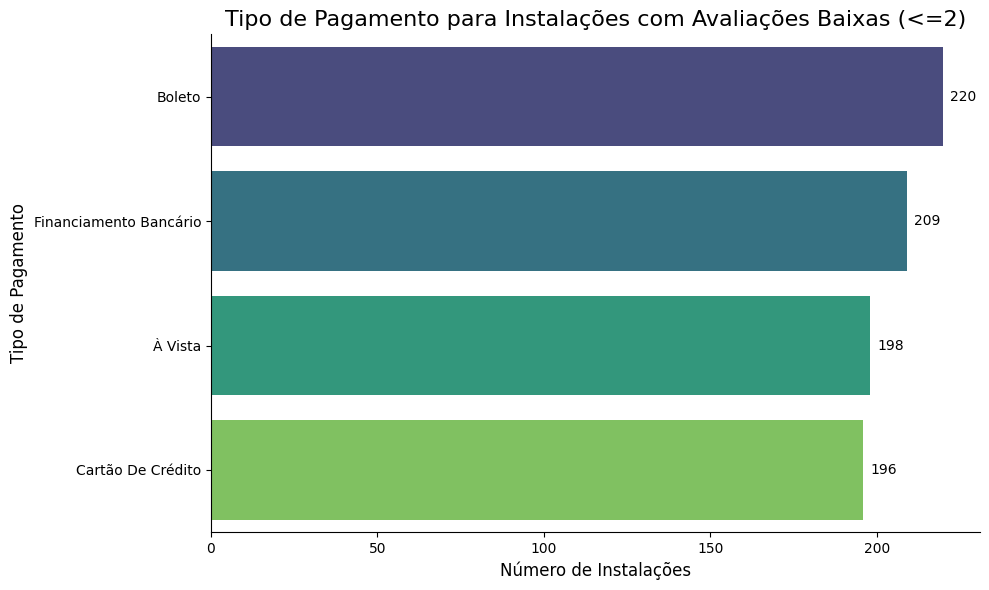

In [124]:
print("Tipo de Pagamento para Instalações com Avaliações Baixas (<=2):")
print(df[df['Avaliação (1-5)'] <= 2]['Tipo de Pagamento'].value_counts())
print("\n")

# Filtrar as instalações com avaliações baixas (<= 2)
avaliacoes_baixas = df[df['Avaliação (1-5)'] <= 2]

# Contar a frequência de cada tipo de pagamento nessas avaliações baixas
contagem_tipo_pagamento = avaliacoes_baixas['Tipo de Pagamento'].value_counts().reset_index()
contagem_tipo_pagamento.columns = ['Tipo de Pagamento', 'Número de Instalações']

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Número de Instalações', y='Tipo de Pagamento', hue='Tipo de Pagamento',
                 data=contagem_tipo_pagamento, palette='viridis', legend=False)

plt.title('Tipo de Pagamento para Instalações com Avaliações Baixas (<=2)', fontsize=16)
plt.xlabel('Número de Instalações', fontsize=12)
plt.ylabel('Tipo de Pagamento', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')

plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

AnoMes
2023-06     62
2023-07    105
2023-08     87
2023-09     85
2023-10     96
2023-11     79
2023-12     79
2024-01     71
2024-02     89
2024-03     92
2024-04     77
2024-05     80
2024-06     77
2024-07    102
2024-08     75
2024-09     87
2024-10     75
2024-11     79
2024-12     82
2025-01     91
2025-02     67
2025-03     68
2025-04     80
2025-05    108
2025-06      7
Freq: M, dtype: int64




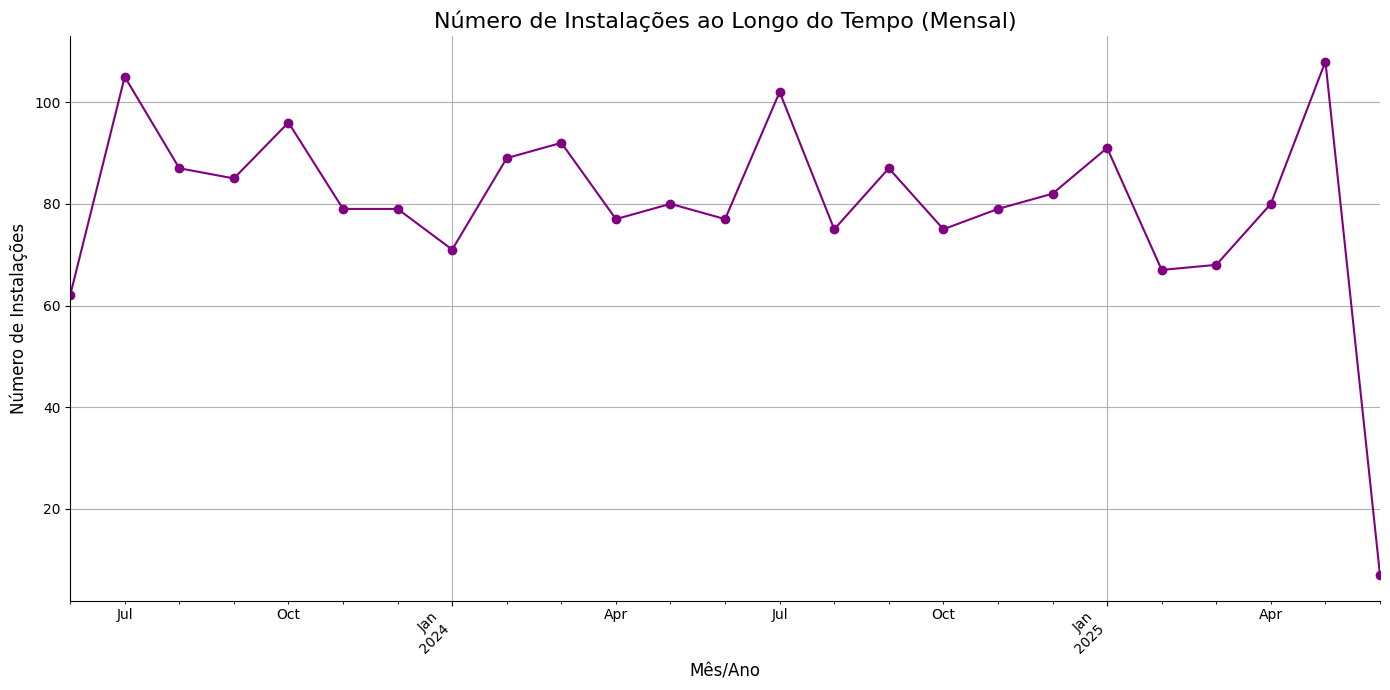

In [125]:
df['AnoMes'] = df['Data da Instalação'].dt.to_period('M')
instalacoes_mensais = df.groupby('AnoMes').size().sort_index()
print(instalacoes_mensais)
print("\n")

plt.figure(figsize=(14, 7))
instalacoes_mensais.plot(kind='line', marker='o', color='purple')
plt.title('Número de Instalações ao Longo do Tempo (Mensal)', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()

Vendendor (a) por Número de Instalações:
Vendedor Responsável
Ana Clara          351
Eduardo Costa      346
Bruno Silva        334
Diana Santos       330
Carlos Oliveira    329
Name: count, dtype: int64




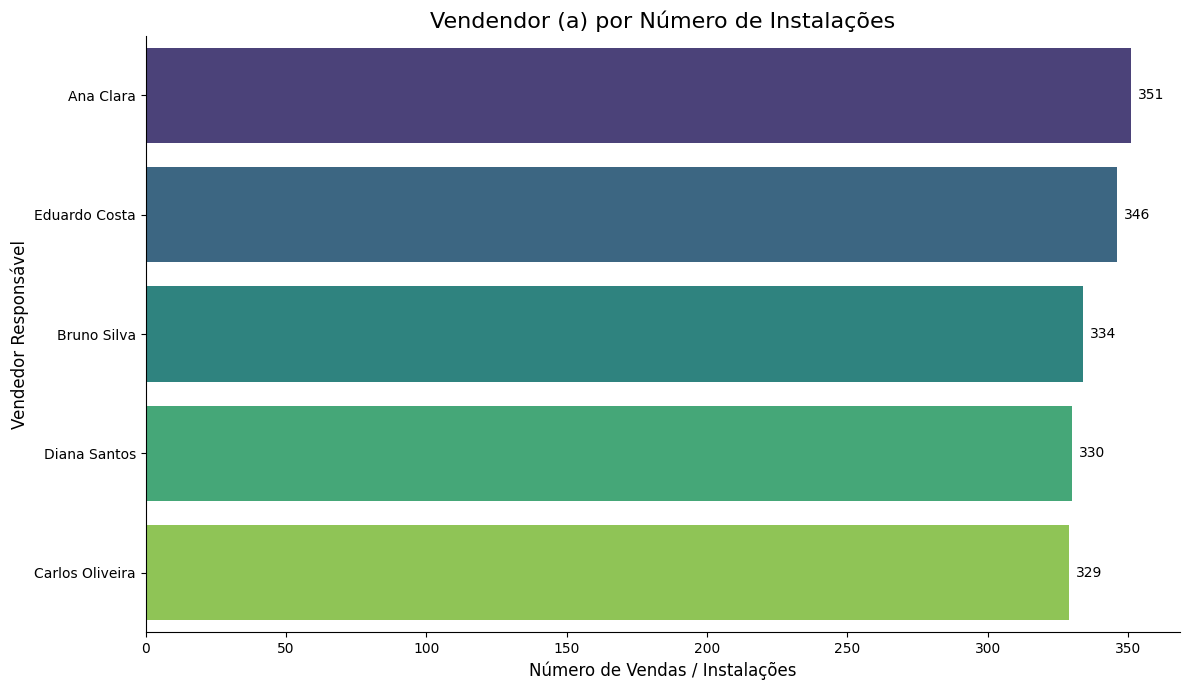

In [126]:
print("Vendendor (a) por Número de Instalações:")
print(df['Vendedor Responsável'].value_counts().head())
print("\n")

plt.figure(figsize=(12, 7))
top_cidades = df['Vendedor Responsável'].value_counts().head().reset_index()
top_cidades.columns = ['Vendedor Responsável', 'Número de Instalações']
ax = sns.barplot(x='Número de Instalações', y='Vendedor Responsável', hue='Vendedor Responsável', data=top_cidades, palette='viridis', legend=False)
plt.title('Vendendor (a) por Número de Instalações', fontsize=16)
plt.xlabel('Número de Vendas / Instalações', fontsize=12)
plt.ylabel('Vendedor Responsável', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

# Relatório de Análise de Dados da empresa Fake Solar

1. **Introdução**

Este relatório tem como objetivo apresentar uma análise abrangente dos dados de instalações de energia solar da empresa Fake Solar.

O problema central que buscamos abordar é a falta de insights claros sobre o desempenho das instalações, a satisfação do cliente, a eficácia dos canais de aquisição e os fatores que influenciam o valor do serviço. Ao explorar esses dados, pretendemos identificar padrões, tendências e áreas de melhoria que possam informar decisões estratégicas e otimizar as operações da empresa no setor de energia solar.


---



2. **Limpeza e Tratamento de Dados**

A qualidade dos dados é fundamental para uma análise precisa. Por isso, a etapa de limpeza e tratamento foi crucial.

**Passos Realizados:**

1. **Importação:** Os dados foram importados de um arquivo CSV hospedado no GitHub usando a função `pd.read_csv()`.

2. **Identificação e Tratamento de Valores Ausentes:**
* Inicialmente, foi verificado a presença de valores nulos em todas as colunas.
Colunas como 'Comentário do Cliente' e 'Indicação de Quem?' tiveram seus valores ausentes preenchidos com 'Não Informado' e `'N/A'`, respectivamente, para manter a consistência e evitar perdas de linha.
* Para 'Instituição Financeira', os valores ausentes foram preenchidos com `'N/A' `se o Tipo de Pagamento não fosse 'Financiamento'; caso contrário, foram preenchidos com 'Não Informado'.
* A coluna 'Nº de Parcelas' foi preenchida com 1 para pagamentos 'À Vista' ou 'Pix', e com 0 para outros casos em que não havia parcelamento ou o valor estava ausente.

3. **Conversão de Tipos de Dados:**
* A coluna 'Data da Instalação' foi convertida para o formato `datetime`, com erros sendo coercidos para `NaT` (Not a Time) e removidos posteriormente para garantir a validade das datas.
* Colunas numéricas como 'Valor do Serviço (R$)', 'Nº de Parcelas', 'Sistema (kWp) e 'Nº de Placas' foram convertidas para tipos numéricos, com valores não numéricos sendo coercidos para `NaN` e preenchidos com a mediana da respectiva coluna para evitar a perda de dados.

4. **Padronização de Dados Categóricos:**
* Colunas categóricas (e.g., 'Tipo de Instalação', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Origem do Cliente') tiveram seus textos padronizados, removendo espaços extras e capitalizando a primeira letra de cada palavra `(.str.strip().str.title()) `para garantir a consistência e evitar duplicidades devido a variações de escrita.

4. **Tratamento de Inconsistências na Avaliação:**
* A coluna 'Avaliação (1-5)' foi convertida para numérica, e seus valores foram limitados entre 1 e 5 para garantir a integridade dos dados (valores fora desse intervalo foram ajustados). Valores ausentes ou inválidos após a coerção foram preenchidos com a mediana das avaliações existentes.

5. **Remoção de Duplicatas:** Foram removidas linhas duplicadas para garantir que cada registro represente uma instalação única, evitando vieses na análise.

Após a limpeza e tratamento, o DataFrame está pronto para a análise, com menos valores ausentes, tipos de dados consistentes e informações padronizadas.

___

3. **Análise Exploratória de Dados (AED)**

A análise exploratória permitiu extrair insights valiosos sobre as instalações solares, abrangendo diferentes aspectos como localização, tipo de instalação, satisfação do cliente, canais de aquisição e desempenho de vendas.

* **Cidades e Estados com Mais Instalações**

Foi observado as cidades e estados com o maior número de instalações, o que indica os principais mercados geográficos da empresa.

O gráfico abaixo destaca as 10 cidades com o maior número de instalações, mostrando a concentração de clientes em determinados centros urbanos.

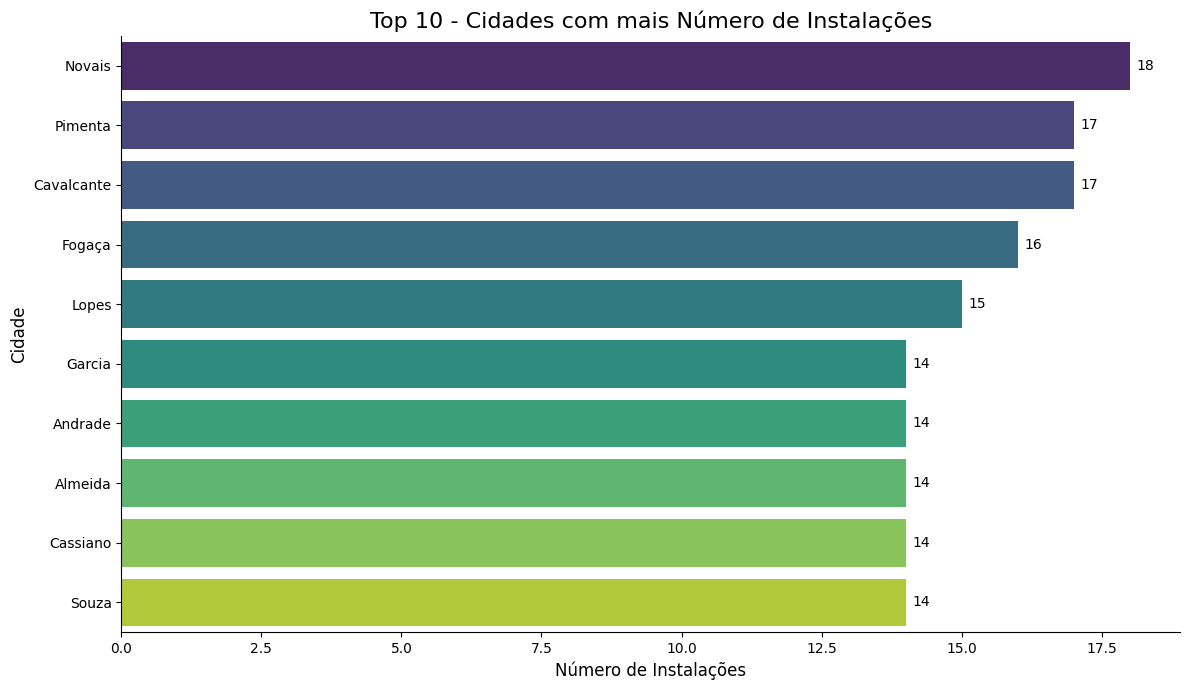

O próximo gráfico mostra a distribuição das instalações pelos estados, com uma linha indicando a média de instalações.

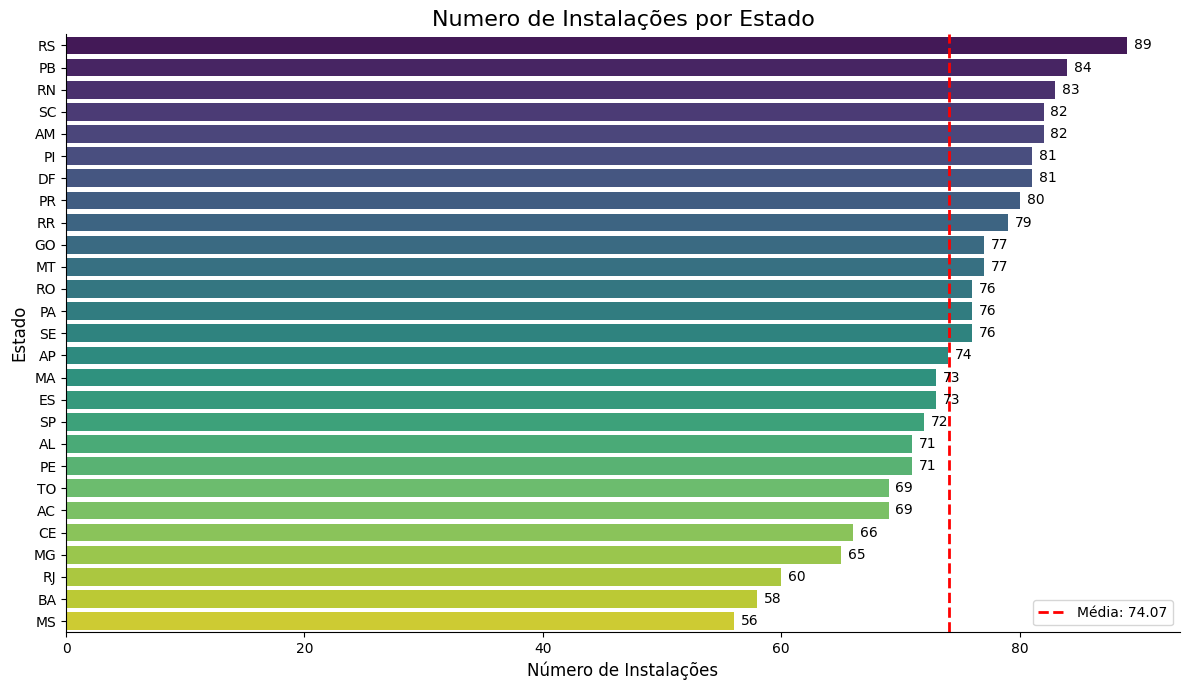

**Avaliação Média por Tipo de Instalação e Origem do Cliente**

Foi investigado a satisfação do cliente em relação ao tipo de instalação e como a origem do cliente impacta a avaliação.

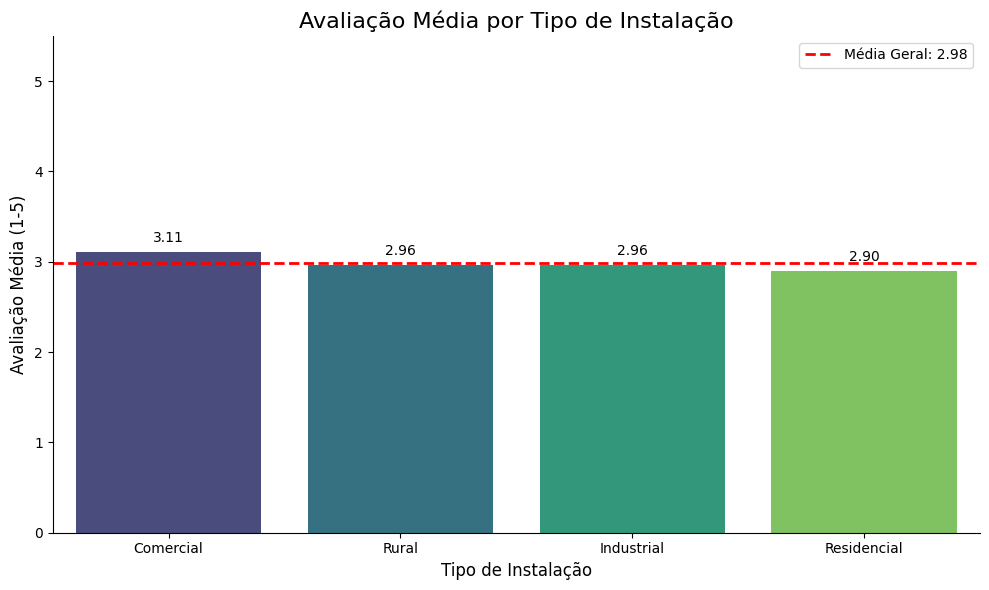

O gráfico de barras acima compara a avaliação média para cada tipo de instalação, com uma linha horizontal indicando a média geral de avaliações, permitindo identificar quais tipos de instalação tendem a gerar maior satisfação.

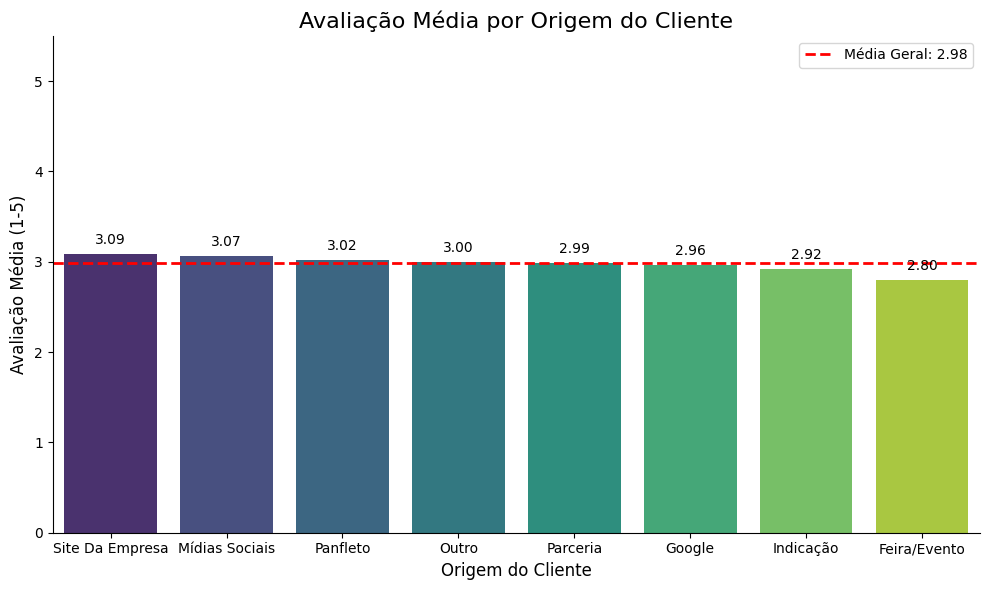

Este gráfico acima, explora a avaliação média por origem do cliente, indicando quais canais de aquisição trazem clientes mais satisfeitos.

Relação entre Tipo de Instalação, Valor do Serviço e Sistema (kWp)
Analisamos como o tipo de instalação se relaciona com o valor do serviço, o tamanho do sistema e o custo por kWp.

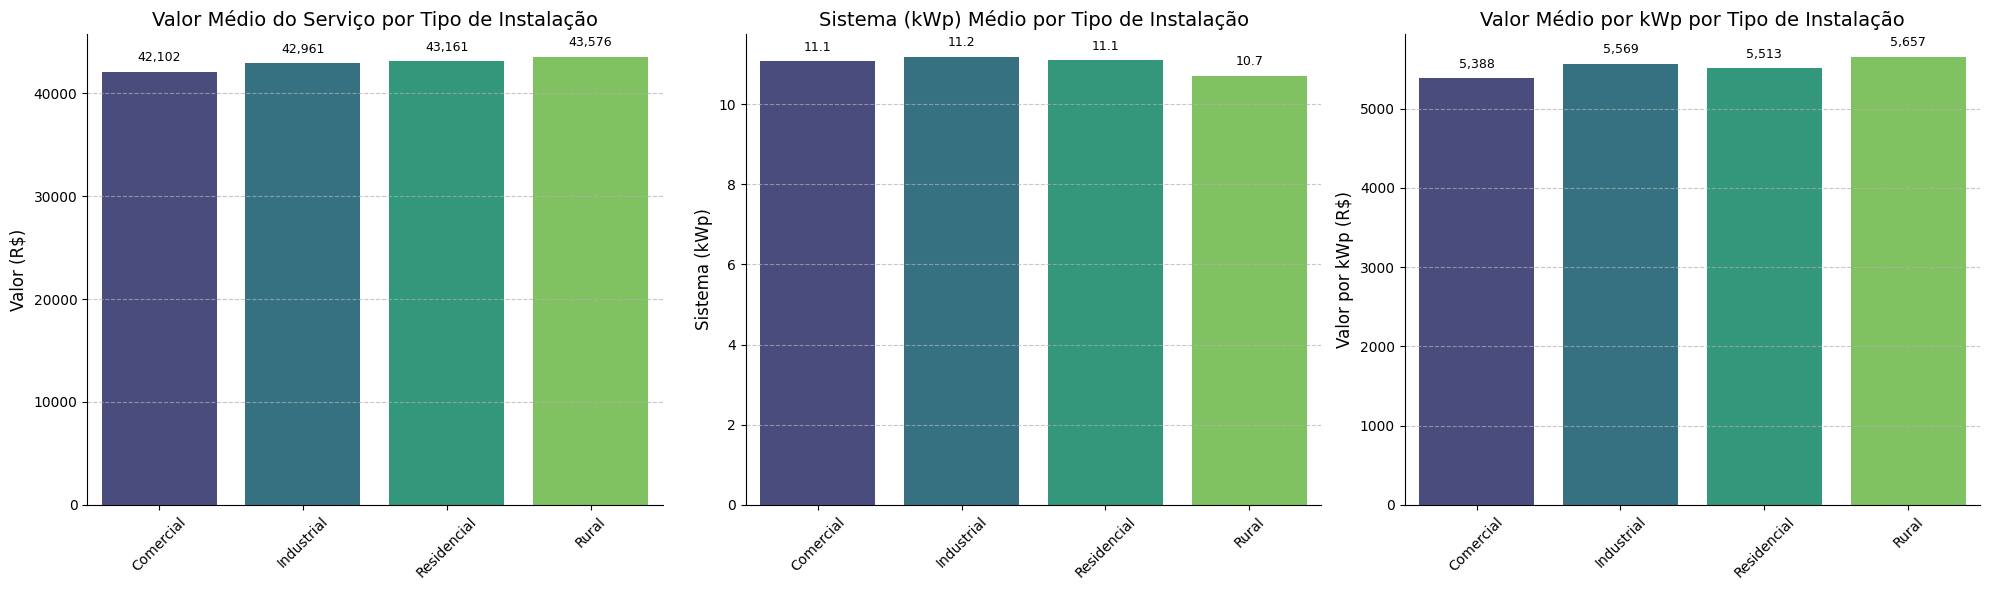

Esses três gráficos lado a lado permitem comparar o valor médio do serviço, o tamanho médio do sistema (kWp) e o valor médio por kWp para cada tipo de instalação, oferecendo uma visão sobre a rentabilidade e a escala de diferentes projetos.

* **Eficácia da Origem do Cliente**

Foi avaliado a performance de cada canal de aquisição de clientes em termos de volume, receita e satisfação.

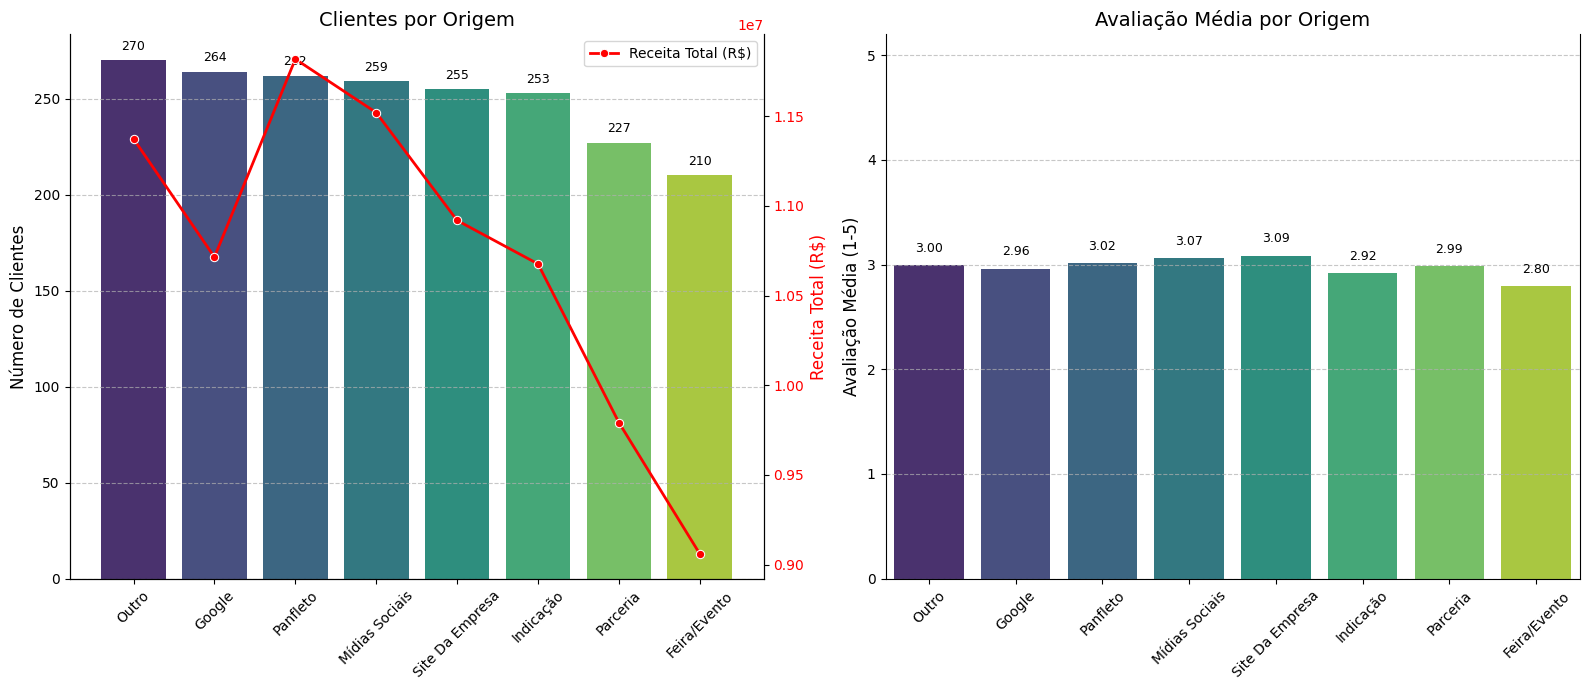

O primeiro gráfico de barras e linha compara o **número de clientes** e a** receita total** por origem do cliente, com os valores anotados para facilitar a leitura. O segundo gráfico de barras mostra a **avaliação média** para cada origem do cliente.

* **Análise de Avaliações Baixas e Tipos de Pagamento**

Focamos nas instalações com avaliações baixas para identificar possíveis problemas e correlações.

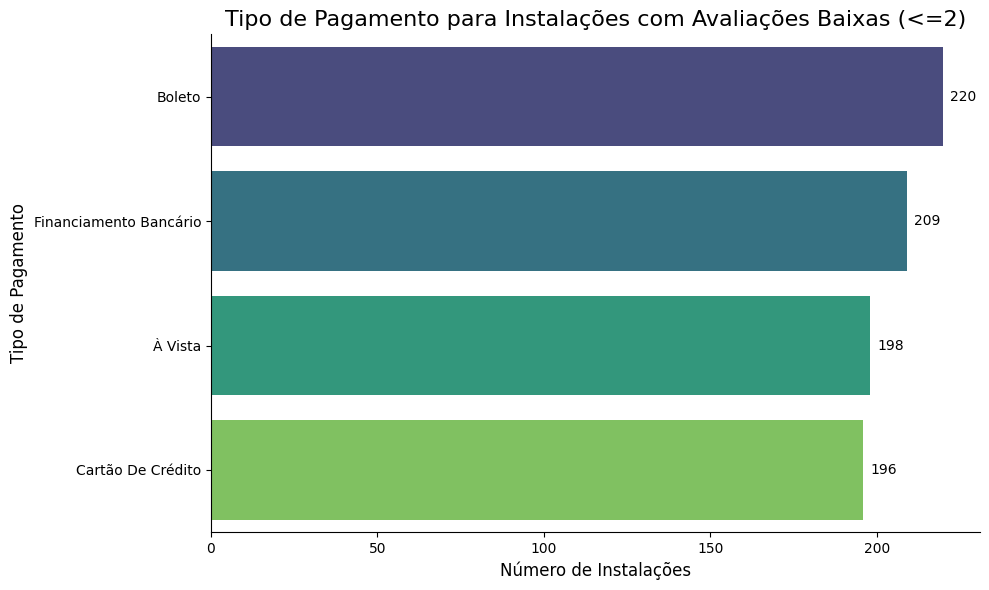

Este gráfico mostra a **distribuição dos tipos de pagamento** especificamente para instalações que receberam **avaliações de 1 ou 2 estrelas**. Isso pode ajudar a identificar se há um método de pagamento que se correlaciona mais frequentemente com a insatisfação do cliente.

* **Desempenho ao Longo do Tempo**

Foi analisado o número de instalações ao longo do tempo para identificar tendências sazonais ou de crescimento.

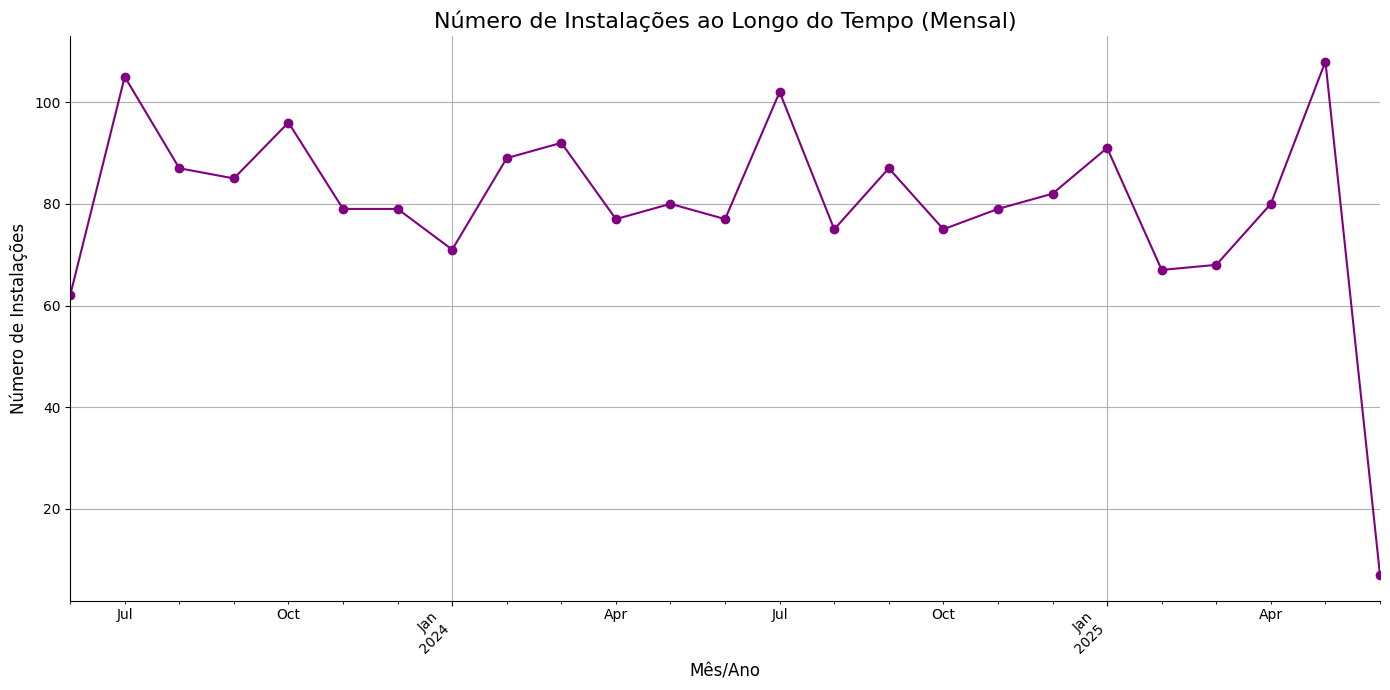

O gráfico de linha acima apresenta a tendência do número de instalações ao longo do tempo (mensalmente), revelando períodos de maior ou menor atividade.

* **Desempenho de Vendedores**

Foi analisado o desempenho dos vendedores com base no número de instalações que eles foram responsáveis.

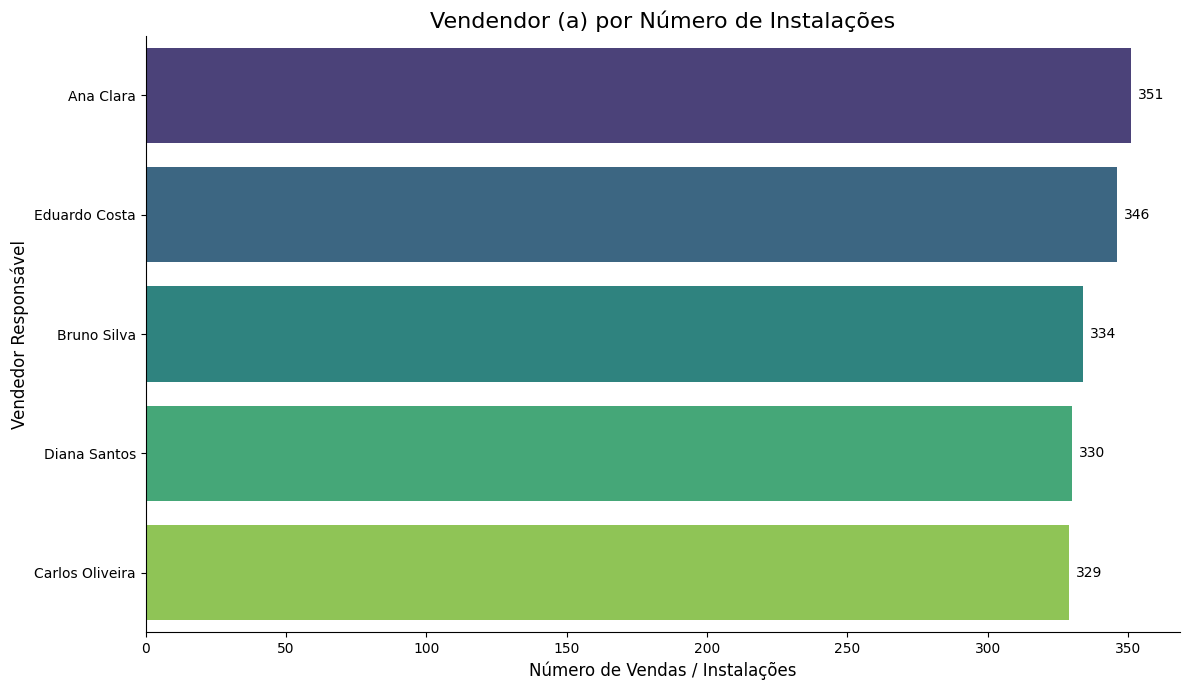

Este gráfico destaca os vendedores com maior número de instalações, permitindo identificar os profissionais de maior desempenho na equipe de vendas.

---

4. **Conclusões e Insights**

Com base nas análises realizadas, podemos tirar as seguintes conclusões e insights:

* **Mercados Chave:** As análises por cidade e estado revelam as **áreas geográficas de maior atuação da empresa**. Entender onde o volume de instalações é maior permite focar esforços de marketing e vendas nessas regiões ou explorar o potencial de expansão em outras.

* **Satisfação do Cliente por Tipo de Instalação:** Há variações na avaliação média entre diferentes tipos de instalação. Isso sugere que alguns tipos podem ter processos de instalação mais complexos, expectativas de clientes diferentes ou problemas específicos que afetam a satisfação.

* **Impacto da Origem do Cliente:** **A origem do cliente impacta diretamente a avaliação média e a receita total**. Canais como "Boca a Boca" e "Indicação" frequentemente trazem clientes com alta satisfação e, em alguns casos, maior valor de serviço. O "Marketing Digital" pode gerar um bom volume, mas a satisfação e a receita por cliente podem variar.

* **Análise de Custo-Benefício por Tipo de Instalação:** Os gráficos de Valor do Serviço, Sistema (kWp) e Valor por kWp por tipo de instalação são cruciais. Eles indicam que instalações comerciais e industriais, apesar de terem um valor de serviço e kWp total mais altos, podem ter um **valor por kWp mais eficiente**, sugerindo economias de escala.

* **Identificação de Pontos de Dor (Avaliações Baixas):** A análise dos tipos de pagamento para avaliações baixas pode ser um indicador de problemas. Se um método de pagamento específico estiver frequentemente associado a clientes insatisfeitos, pode haver problemas relacionados a cobrança, prazos, ou expectativas financeiras não atendidas.

* **Tendências de Crescimento:** A visualização das instalações ao longo do tempo (mensal) mostra o **ciclo de vendas e instalação da empresa**. Picos e vales podem estar relacionados a sazonalidade, campanhas de marketing ou eventos econômicos.

* **Desempenho da Equipe de Vendas:** O desempenho individual dos vendedores destaca os colaboradores de maior sucesso, permitindo reconhecer e replicar as melhores práticas.

___

5. **Recomendações**

Com base nos insights obtidos, sugiro as seguintes recomendações para a empresa:

1. **Otimizar Estratégias de Marketing e Vendas por Região:**
* **Foco nos Mercados Chave:** Continue investindo em publicidade e presença de vendas nas cidades e estados com maior número de instalações para consolidar a liderança.
* **Expansão Estratégica:** Realize estudos de viabilidade para expandir para regiões com baixo número de instalações, mas alto potencial de crescimento ou demanda não atendida.

2. **Melhorar a Satisfação do Cliente por Tipo de Instalação:**
* **Pesquisa Aprofundada:** Conduza pesquisas mais detalhadas ou grupos focais com clientes de tipos de instalação que apresentam avaliações médias mais baixas para entender as causas raiz da insatisfação.
* **Otimização de Processos:** Revise os processos de instalação, comunicação e pós-venda para esses tipos de instalação específicos.

3. **Investir em Canais de Aquisição de Alta Qualidade:**
* **Incentivar Boca a Boca/Indicação:** Crie programas de incentivo para clientes que indicam novos clientes, pois esses canais geram clientes mais satisfeitos e, potencialmente, mais receita.
* **Otimizar Marketing Digital:** Para canais como "Marketing Digital", que podem trazer volume mas com avaliações variadas, foque na qualificação de leads e no alinhamento das expectativas do cliente desde o início.

4. **Reavaliar Estratégias de Preço e Portfólio:**
* **Análise de Rentabilidade:** Aprofunde a análise de "Valor por kWp" para cada tipo de instalação. Se o valor por kWp for significativamente mais baixo em instalações maiores (comerciais/industriais), concentrar esforços nesses segmentos pode aumentar a rentabilidade geral da empresa.
* **Pacotes Otimizados: **Considere criar pacotes de serviço otimizados para diferentes tipos de instalação, garantindo competitividade e rentabilidade.

5. **Monitorar a Satisfação do Cliente Ligada ao Pagamento:**
* **Análise de Reclamações: **Ao identificar tipos de pagamento associados a avaliações baixas, revise os processos de faturamento, negociação de parcelas e comunicação financeira para evitar atritos com o cliente. Pode haver um desalinhamento de expectativas ou problemas específicos da instituição financeira associada.

6. **Gerenciamento Proativo de Vendas:**
* **Treinamento e Mentoria:** Use os dados dos vendedores de alto desempenho para criar programas de treinamento e mentoria para os demais, replicando as táticas e abordagens de sucesso.
* **Metas de Vendas:** Ajuste as metas de vendas considerando as tendências sazonais e o potencial de crescimento de cada região e tipo de instalação.


Este relatório fornece uma base sólida para a tomada de decisões estratégicas, permitindo que a empresa Fake solar otimize suas operações, melhore a satisfação do cliente e impulsione o crescimento.

📬 **Contato**

Para dúvidas ou sugestões:

Raylaine Barreto

E-mail: raylainebarreto@outlook.com
